In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

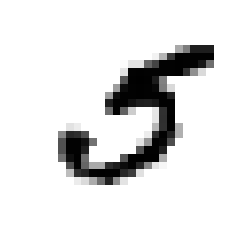

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = mnist["data"][36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")

plt.axis("off")
plt.show()

In [4]:
mnist["target"][36000]

5.0

In [5]:
train_data, test_data, train_label, test_label = mnist["data"][:60000], mnist["data"][60000:], mnist["target"][:60000], mnist["target"][60000:]

In [6]:
import numpy as np

In [7]:
shuffle_index = np.random.permutation(60000)
train_data, train_label = train_data[shuffle_index], train_label[shuffle_index]

## Building a Binary Classifier just to find 5's

In [8]:
train_label_5 = (train_label == 5)
test_label_5 = (test_label == 5)

In [56]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3, n_jobs=8)
sgd_clf.fit(train_data, train_label_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=8, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, train_data, train_label_5, cv=3, scoring="accuracy")

array([0.96475, 0.967  , 0.96085])

In [13]:
from sklearn.model_selection import cross_val_predict

train_label_predict = cross_val_predict(sgd_clf, train_data, train_label_5, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_label_5, train_label_predict)

array([[53764,   815],
       [ 1333,  4088]])

In [15]:
from sklearn.metrics import precision_score, recall_score

precision_score(train_label_5, train_label_predict)

0.8337752396491944

In [16]:
recall_score(train_label_5, train_label_predict)

0.7541044087806678

In [17]:
from sklearn.metrics import f1_score

f1_score(train_label_5, train_label_predict)

0.7919411080976365

In [26]:
from sklearn.metrics import precision_recall_curve

decision_functions = cross_val_predict(sgd_clf, train_data, train_label_5, cv=3, method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(train_label_5, decision_functions)

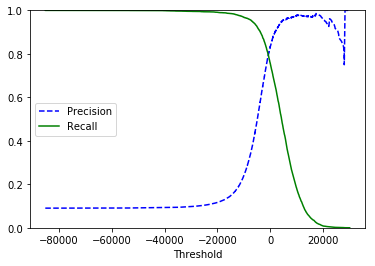

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [45]:
train_label_pred_90 = (decision_functions > 1500)
precision_score(train_label_5, train_label_pred_90), recall_score(train_label_5, train_label_pred_90)

(0.8922963689892051, 0.6709094263051097)

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_label_5, decision_functions)

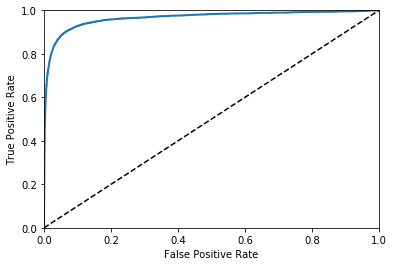

In [48]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_label_5, decision_functions)

0.9654717993149211

In [58]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=8)
train_label_probas_forest = cross_val_predict(forest_clf, train_data, train_label_5, cv=3, method="predict_proba")

In [52]:
train_label_scores_forest = train_label_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_label_5, train_label_scores_forest)

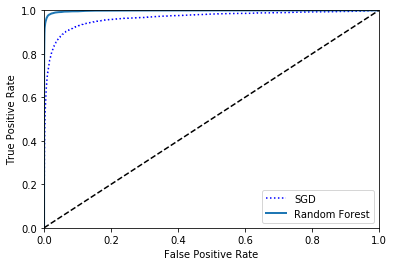

In [53]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [54]:
roc_auc_score(train_label_5, train_label_scores_forest)

0.9981588943779715

## Playing with multi classifiers

In [57]:
sgd_clf.fit(train_data, train_label)
sgd_clf.predict([some_digit])

array([5.])

In [59]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [60]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=1000, tol=1e-3, n_jobs=8))
ovo_clf.fit(train_data, train_label)
ovo_clf.predict([some_digit])

array([5.])

In [61]:
len(ovo_clf.estimators_)

45

In [62]:
forest_clf.fit(train_data, train_label)
forest_clf.predict([some_digit])

array([5.])

In [63]:
train_label_predict = cross_val_predict(sgd_clf, train_data, train_label, cv=3)

In [64]:
conf_mx = confusion_matrix(train_label, train_label_predict)

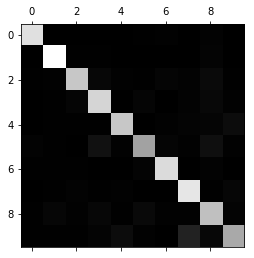

In [66]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [68]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

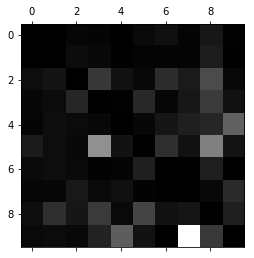

In [69]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## Multilabel Classification

In [70]:
from sklearn.neighbors import KNeighborsClassifier

train_label_large = (train_label >= 7)
train_label_odd = (train_label % 2 == 1)
train_multilabel = np.c_[train_label_large, train_label_odd]

In [71]:
knn_clf = KNeighborsClassifier(n_jobs=8)
knn_clf.fit(train_data, train_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=8, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
train_label_knn_pred = cross_val_predict(knn_clf, train_data, train_multilabel, cv=3)
f1_score(train_multilabel, train_label_knn_pred, average="macro")